<a href="https://colab.research.google.com/github/RudolphMurph/mathematics-for-machine-learning-coursera/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary Libraries such as pandas and numpy for data manipulation, sklearn for regression, yfinance & datetime to get the data of Reliance and matplotlib to plot the data

In [46]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
import datetime 
import matplotlib.pyplot as plt


we are going to fetch the data for last 10 years

In [47]:
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=10*365)


the data is stored in a variable named data 

In [48]:
data = yf.download('Reliance.NS',start=start_date,end=end_date)

[*********************100%***********************]  1 of 1 completed


Preprocessing the data, here we are going to forecast for the future 2%

In [49]:
n_days = 10*252
forecast_out = int(n_days * 0.02)
data['Prediction'] = data[['Close']].shift(-forecast_out)

labeled data is stored in variable X which is independent, variable y is dependent on X which will calculate the prediction 

In [50]:

X = np.array(data.drop(['Prediction'], 1))[:-forecast_out]


y = np.array(data['Prediction'])
y = y[:-forecast_out] 


<ipython-input-50-48f318f98f0e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['Prediction'], 1))[:-forecast_out]


the data is split into 80:20 for training and testing

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

creating and testing Linear Regression model

In [52]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

testing the model

In [53]:
lr.confidence = lr.score(x_test,y_test)
print("Linear Regression Confidence:", lr.confidence )

Linear Regression Confidence: 0.9576758714437147


predicting the future stock price

In [54]:

x_forecast = np.array(data.drop(['Prediction'], 1))[-forecast_out:]


lr_prediction = lr.predict(x_forecast)


<ipython-input-54-7d87f1dd2226>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_forecast = np.array(data.drop(['Prediction'], 1))[-forecast_out:]


plotting the actual vs predicted price 

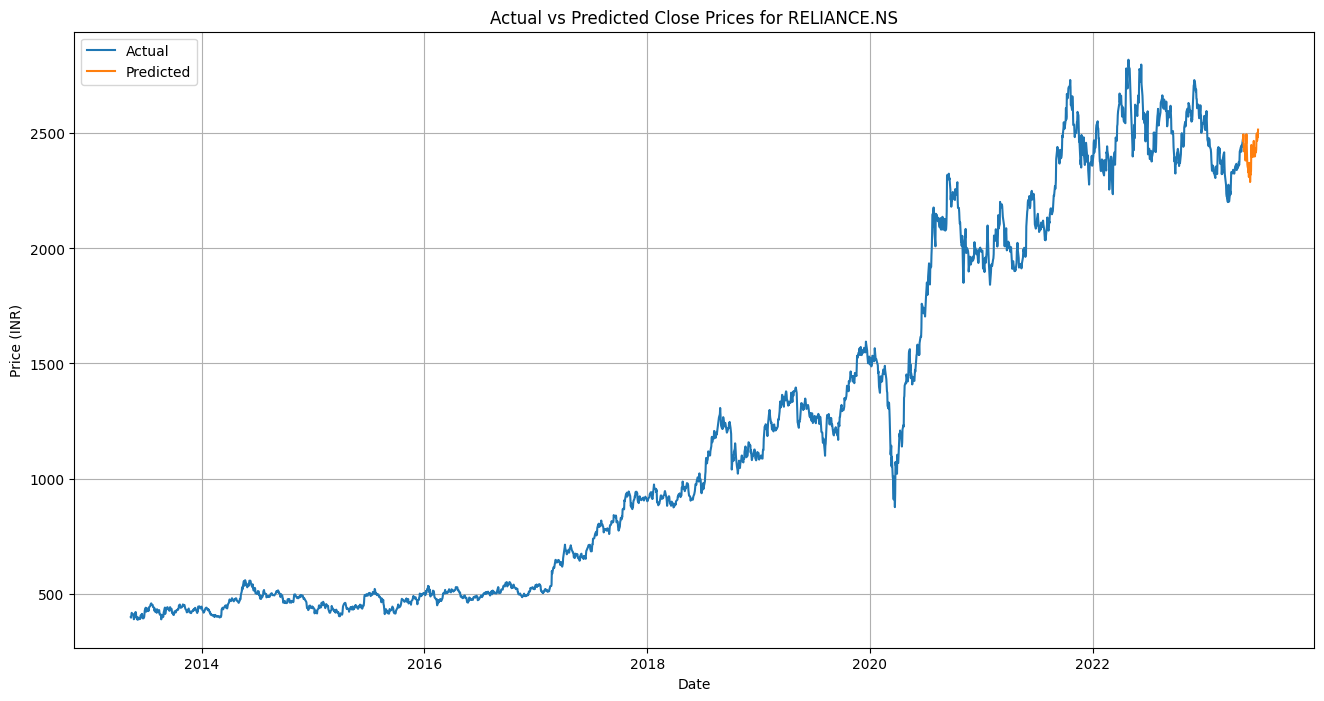

In [55]:
# Plotting the actual vs predicted prices
predicted_dates = pd.date_range(start=end_date, periods=forecast_out).tolist()
plt.figure(figsize=(16,8))
plt.plot(data.index, data['Close'], label='Actual')
plt.plot(predicted_dates, lr_prediction, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.title('Actual vs Predicted Close Prices for RELIANCE.NS')
plt.legend()
plt.grid(True)
plt.show()
